   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Ac

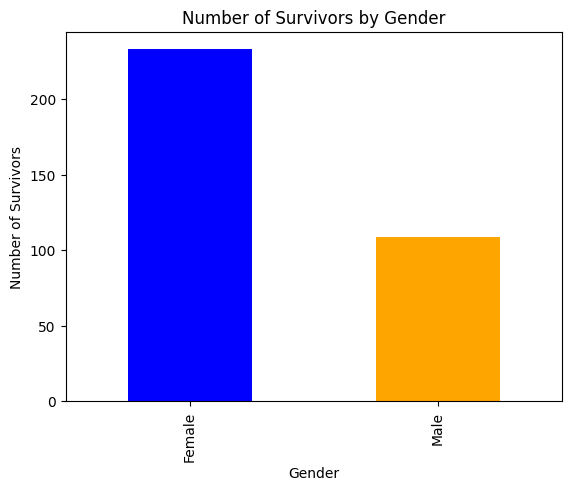

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data = pd.read_csv('/content/Titanic-Dataset.csv')

# Display the first few rows of the dataset
print(data.head())

# Handle missing values for 'Age' and 'Embarked'
age_imputer = SimpleImputer(strategy='median')
data['Age'] = age_imputer.fit_transform(data[['Age']])
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' due to too many missing values
data.drop(columns=['Cabin'], inplace=True)

# Encode categorical features 'Sex' and 'Embarked'
sex_encoder = LabelEncoder()
data['Sex'] = sex_encoder.fit_transform(data['Sex'])
embarked_encoder = LabelEncoder()
data['Embarked'] = embarked_encoder.fit_transform(data['Embarked'])

# Define features and target variable
features = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
target = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

# Filter the dataset to include only passengers who survived
survivors = data[data['Survived'] == 1]
print(survivors)

# Create a bar chart showing the number of survivors by gender
survivor_counts = survivors['Sex'].value_counts()
# Convert numeric encoding back to original labels
survivor_counts.index = ['Female', 'Male'] if survivor_counts.index[0] == 0 else ['Male', 'Female']
survivor_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Number of Survivors by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.show()
